In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv('Training Dataset/training datalist.csv')
display(df.head())

,ID,Sex,Age,Disease category,Narrow pitch range,Decreased volume,Fatigue,Dryness,Lumping,heartburn,...,Onset of dysphonia,Noise at work,Occupational vocal demand,Diabetes,Hypertension,CAD,Head and Neck Cancer,Head injury,CVA,Voice handicap index - 10
0,1202f15,2,39,1,1,1,1,1,1,0,...,2,3,1,0,0,0,0,0,0,22.0
1,0600ve0,1,69,2,1,1,1,1,0,0,...,2,1,3,0,0,0,0,0,1,19.0
2,1001o7l,2,59,2,1,1,1,1,0,0,...,2,3,4,0,0,0,0,0,0,18.0
3,1201c1t,2,47,1,1,0,1,1,1,0,...,3,1,1,0,0,0,0,0,0,27.0
4,0402jvt,1,87,1,0,0,0,0,0,0,...,1,1,4,0,1,0,0,0,0,16.0


In [13]:
# data cleaning
df['PPD'].fillna(0, inplace=True)
df.dropna(subset=['Voice handicap index - 10'], inplace=True)
# df.info()
df.reset_index(drop=True, inplace=True)

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(['ID', 'Disease category'], axis=1)
# X = df[features]
y = df['Disease category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

scaler = StandardScaler().fit(X_train.values)
X_train_norm = scaler.transform(X_train.values)
X_test_norm = scaler.transform(X_test.values)

In [15]:
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(X_train_norm, y_train.values)

y_pred = svc_model.predict(X_test_norm)

In [16]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test.values, y_pred)
precision = precision_score(y_test.values, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test.values, y_pred, average='weighted', zero_division=1)
f1 = f1_score(y_test.values, y_pred, average='weighted', zero_division=1)

print(f"Accuracy: {accuracy.round(2)}")
print(f"Precision: {precision.round(2)}")
print(f"Recall: {recall.round(2)}")
print(f"F1: {f1.round(2)}")

print(classification_report(y_test.values, y_pred, zero_division=1))
print(confusion_matrix(y_test.values, y_pred))

Accuracy: 0.63
Precision: 0.67
Recall: 0.63
F1: 0.6
              precision    recall  f1-score   support

           1       0.68      0.87      0.76       153
           2       0.45      0.48      0.47        64
           3       0.74      0.42      0.54        59
           4       1.00      0.00      0.00        11
           5       1.00      0.00      0.00        11

    accuracy                           0.63       298
   macro avg       0.77      0.36      0.35       298
weighted avg       0.67      0.63      0.60       298

[[133  14   6   0   0]
 [ 30  31   3   0   0]
 [ 16  18  25   0   0]
 [  5   6   0   0   0]
 [ 11   0   0   0   0]]


In [17]:
# Get feature importance
support_vectors = svc_model.support_vectors_
support_vector_indices = svc_model.support_
support_vector_features = X.iloc[support_vector_indices, :]

average_support_vector = support_vector_features.mean()

feature_importance = np.abs(average_support_vector)
sorted_indices = np.argsort(feature_importance)[::-1]

# Print the feature ranking
print("Feature ranking:")
for i, feature_index in enumerate(sorted_indices):
    feature_name = X.columns[feature_index]
    importance = feature_importance[feature_index]
    print(f"{i + 1}. {feature_name}: {importance}")


Feature ranking:
1. Age: 48.221014492753625
2. Voice handicap index - 10: 23.244565217391305
3. Diurnal pattern: 2.7934782608695654
4. Onset of dysphonia : 2.378623188405797
5. Occupational vocal demand: 1.9728260869565217
6. Sex: 1.608695652173913
7. Noise at work: 1.6032608695652173
8. Drinking: 0.5942028985507246
9. Fatigue: 0.5307971014492754
10. Smoking: 0.5018115942028986
11. Dryness: 0.48731884057971014
12. Narrow pitch range: 0.4311594202898551
13. Decreased volume: 0.42028985507246375
14. Lumping: 0.39311594202898553
15. frequency: 0.358695652173913
16. PND: 0.2554347826086957
17. Eye dryness: 0.2028985507246377
18. Choking: 0.18297101449275363
19. PPD: 0.15298913043478263
20. Hypertension: 0.08695652173913043
21. heartburn: 0.08514492753623189
22. Diabetes: 0.059782608695652176
23. CAD: 0.050724637681159424
24. Head and Neck Cancer: 0.028985507246376812
25. CVA: 0.007246376811594203
26. Head injury: 0.0018115942028985507


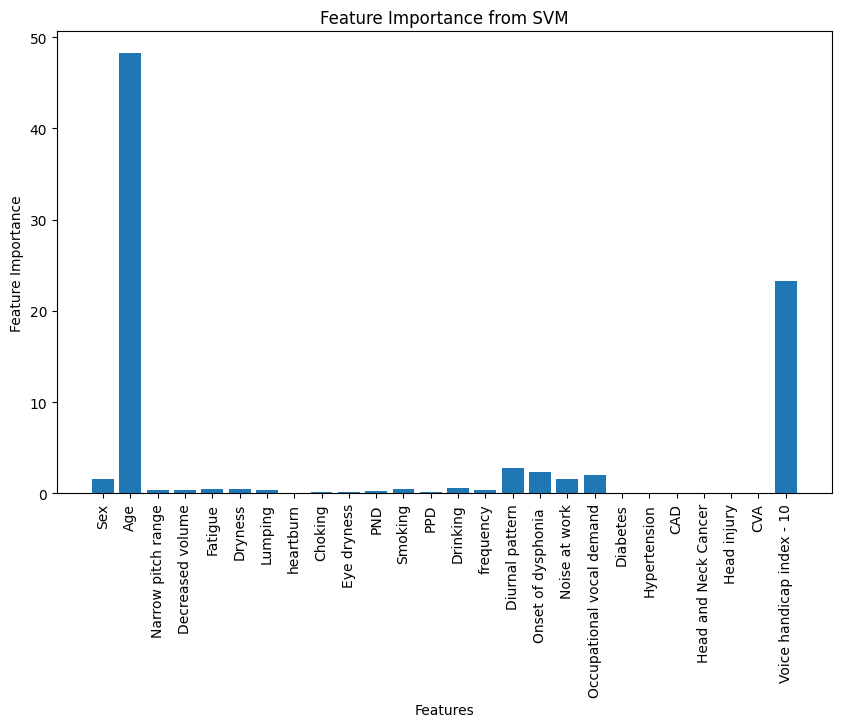

In [18]:
# plot feature importance
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(X.columns, average_support_vector)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Feature Importance from SVM')
plt.show()


In [19]:
# Get the top 10 features
top_10_features = X.columns[sorted_indices][:10].to_list()
print(top_10_features)

['Age', 'Voice handicap index - 10', 'Diurnal pattern', 'Onset of dysphonia ', 'Occupational vocal demand', 'Sex', 'Noise at work', 'Drinking', 'Fatigue', 'Smoking']


In [20]:
# Get the least 5 features
least_5_features = X.columns[sorted_indices][-5:].to_list()
print(least_5_features)

['Diabetes', 'CAD', 'Head and Neck Cancer', 'CVA', 'Head injury']
